In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

nwhl_df = pd.read_csv('hackathon_nwhl.csv')

<h1>Goal:</h1>
A shot on goal defined: https://en.wikipedia.org/wiki/Shot_on_goal_(ice_hockey)

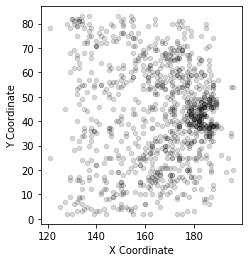

In [21]:
nwhl_net_attempts = nwhl_df.loc[nwhl_df['Detail 2'].eq('On Net')].copy()

fig1, ax1 = plt.subplots(facecolor='white')
nwhl_net_attempts.plot.scatter('X Coordinate','Y Coordinate', color='k', alpha=.15, ax=ax1)
ax1.set_aspect('equal')

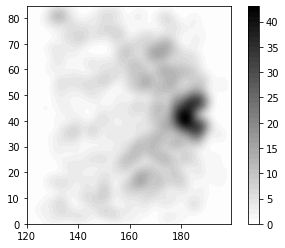

In [22]:
x, y = np.mgrid[120:200:.5, 0:85:.5]
pos = np.dstack((x, y))

def point_pdf(point):
    # print(point)
    xp = point['X Coordinate']
    yp = point['Y Coordinate']
    rv = multivariate_normal([xp, yp], 5)
    r = rv.pdf(pos)
    return r/r.max()

nwhl_net_attempts['pdf'] = nwhl_net_attempts[['X Coordinate','Y Coordinate']].apply(point_pdf, axis=1)
shots = nwhl_net_attempts['pdf'].sum()

fig2, ax2 = plt.subplots(facecolor='white')
c = ax2.contourf(x, y, shots, 50, cmap='binary')
fig2.colorbar(c)
ax2.set_aspect('equal')

(0, 42.293937506316624)

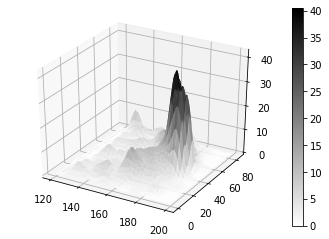

In [23]:
fig3d1, ax3d1 = plt.subplots(subplot_kw={"projection":"3d"}, facecolor='white')

s = ax3d1.plot_surface(x, y, shots, cmap='binary')
fig3d1.colorbar(s)
ax3d1.set_zlim3d(0,shots.max())

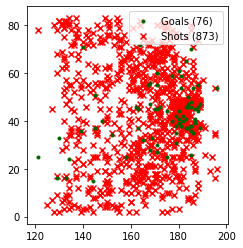

In [24]:
leg_dict = {'Shot':{'color':'red',
                    'marker':'x',
                    'zorder':0},
            'Goal':{'color':'darkgreen',
                    'marker':'.',
                    'zorder':1}}

shot_fig, shot_ax = plt.subplots(facecolor='white')

for event, event_df in nwhl_net_attempts.groupby('Event'):
    n = event_df.shape[0]
    shot_ax.scatter('X Coordinate','Y Coordinate',
                    data=event_df, **leg_dict[event], label=f'{event}s ({n})')

shot_ax.legend()
shot_ax.set_aspect('equal')

(0, 42.293937506316624)

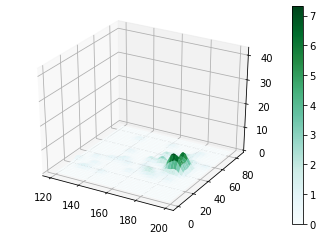

In [25]:
goals = nwhl_net_attempts.loc[nwhl_net_attempts['Event'].eq('Goal'),'pdf'].sum()

fig3d2, ax3d2 = plt.subplots(subplot_kw={"projection":"3d"}, facecolor='white')

s2 = ax3d2.plot_surface(x, y, goals, cmap='BuGn')
fig3d2.colorbar(s2)
ax3d2.set_zlim3d(0,shots.max())

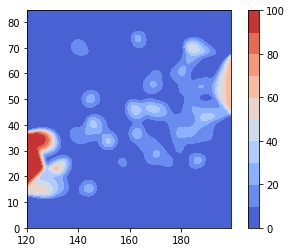

In [27]:
pfig, pax = plt.subplots(facecolor='white')
c = pax.contourf(x, y, 100*goals/shots, 10, cmap='coolwarm')
pfig.colorbar(c)
pax.set_aspect('equal')